In [1]:
################## IMPORTS #############################

## Import all neccessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn import cluster
from sklearn.preprocessing import scale
import seaborn as sns

## import the dataset for the project
data = pd.read_csv("datasets//HF mort data for GMPH.csv",low_memory = False)

import sys
print(sys.version)

data = data.dropna()

3.8.3 (default, Jul  2 2020, 11:26:31) 
[Clang 10.0.0 ]


In [2]:
## x will be the data used for clustering, everything but the class variable (death)
x = data.values[:,[3,10,11,15,18]] #age,diabetes, hypertension, copd, renal insufficiency
xsiguiente = data.values[:,[3,10,11,15,18]] #age,diabetes, hypertension, copd, renal insufficiency (meter los relacionados con edad)
#scaling data
x = scale(x)
## y will be true class variable; so we can compute metrics
y = data.values[:,1]


completeness score 0.04811206274001459
homogeneity score 0.045088685054929384
silhouette score 0.11620915768938841
Max completeness score:  ['average', 'manhattan', 0.08629354709618038, 0.0010287418028445208, 0.3988873793627524]
Max homogeneity score:  ['complete', 'euclidean', 0.04811206274001459, 0.045088685054929384, 0.11620915768938841]
Max silhouette score:  ['average', 'manhattan', 0.08629354709618038, 0.0010287418028445208, 0.3988873793627524]


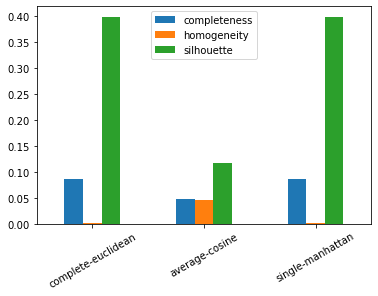

In [3]:
###################### CLUSTERING #####################

## define number of clusters
clusters = 2

#set characteristics of the clustering 
model = cluster.AgglomerativeClustering(n_clusters = clusters,linkage = 'complete',affinity = "euclidean")

#will generate the clusters
model.fit(x)

##compute metrics
print("completeness score", metrics.completeness_score(y,model.labels_))
print("homogeneity score", metrics.homogeneity_score(y,model.labels_))
print("silhouette score", metrics.silhouette_score(x,model.labels_))


###### dendrogram ############# no se si ponerlo porque son todos feos
from scipy.cluster.hierarchy import dendrogram,linkage

## que elijo aqui??

#model = linkage(x,'ward')
#plt.figure(figsize = (16,10))
#dendrogram(model,leaf_rotation = 90.,leaf_font_size = 8.,)
#plt.show()



################## comparison of scores based on distance and affinity measures #############################

## we will loop through the following metrics
link = (['ward','complete', 'average', 'single'])
aff = (['euclidean','manhattan', 'cosine'])

## and save results here
results = []

for i in link:
    for j in aff:
        if (i == 'ward' and aff != 'euclidean'): ## we need to make this condition because ward only works with euclidean 
            continue
        else:    
            ## build model
            model = cluster.AgglomerativeClustering(n_clusters = clusters,linkage = i,affinity = j)
            #model = cluster.AgglomerativeClustering(n_clusters = clusters,linkage = 'single',affinity = "cosine")

            #fit data to our empty model
            model.fit(x)

            c = metrics.completeness_score(y,model.labels_)
            h = metrics.homogeneity_score(y,model.labels_)
            s = metrics.silhouette_score(x,model.labels_)
            
            results.append([i,j,c,h,s])

        
## ideally, would store each value in its vector (3 vectors, one for each type of score) and the find max

## Now we find the variables that maximize each matrix

## COMPLETENESS    
MAX = []
maxV = 0 
maxI = -1
for i in range (0,len(results)):
    if (results[i][2] > maxV):
        maxV = results[i][2]
        maxI = i
      
print('Max completeness score: ', results[maxI] ) 
MAX.append(results[maxI])

##HOOGENEITY
maxV = 0 
maxI = -1
for i in range (0,len(results)):
    if (results[i][3] > maxV):
        maxV = results[i][3]
        maxI = i
        
print('Max homogeneity score: ', results[maxI] )   
MAX.append(results[maxI])

##SILHOUETTE
maxV = 0 
maxI = -1
for i in range (0,len(results)):
    if (results[i][4] > maxV):
        maxV = results[i][4]
        maxI = i
        
print('Max silhouette score: ', results[maxI] ) 
MAX.append(results[maxI])


## create dataframe
datos ={'completeness': [MAX[0][2], MAX[1][2],MAX[2][2]],
       'homogeneity' : [MAX[0][3], MAX[1][3],MAX[2][3]],
       'silhouette'  : [MAX[0][4], MAX[1][4],MAX[2][4]] }

frame = pd.DataFrame(datos)
nombres = ('complete-euclidean','average-cosine','single-manhattan')
frame.plot.bar().set_xticklabels(nombres,rotation = 30)
plt.show()

## the first group maximizes completenss score, middle homogeneity and last one silhouette.


Max completeness score:  [28, 0.019455594267948437, 0.08599573596203407, 0.588303342756444]
Max homogeneity score:  [28, 0.019455594267948437, 0.08599573596203407, 0.588303342756444]
Max silhouette score:  [24, 0.014521011220572672, 0.060605914950693715, 0.5949331866031397]


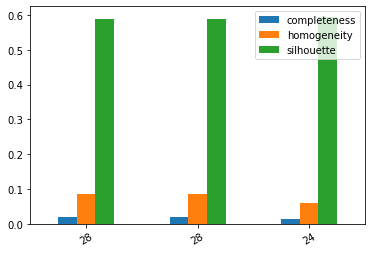

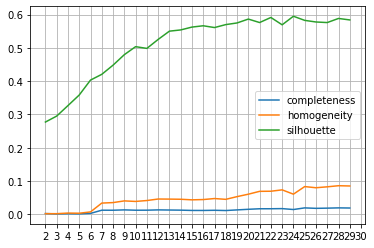

In [4]:
######################### K MEANS ###############################
dict_results = {}



res = []
for i in range(2,30):
    model_K = cluster.KMeans(n_clusters = i)
    model_K.fit(x)
    
    c = metrics.completeness_score(y,model_K.labels_)
    h = metrics.homogeneity_score(y,model_K.labels_)
    s = metrics.silhouette_score(x,model_K.labels_)
    res.append([i,c,h,s])

    dict_results[i] = { 'completeness' : c,
                        'homogeneity' : h,
                        'silhouette' : s,
        
    }
    
    ## Find maximum
## COMPLETENESS    
maxV = 0 
maxI = -1
MAXx = []
for i in range (0,len(res)):
    if (res[i][1] > maxV):
        maxV = res[i][1]
        maxI = i
print('Max completeness score: ', res[maxI] )   
MAXx.append(res[maxI])


##HOOGENEITY
maxV = 0 
maxI = -1
for i in range (0,len(res)):
    if (res[i][2] > maxV):
        maxV = res[i][2]
        maxI = i
print('Max homogeneity score: ', res[maxI] )  
MAXx.append(res[maxI])

##SILHOUETTE
maxV = 0 
maxI = -1
for i in range (0,len(res)):
    if (res[i][3] > maxV):
        maxV = res[i][3]
        maxI = i
print('Max silhouette score: ', res[maxI] )  
MAXx.append(res[maxI])


dato ={'completeness': [MAXx[0][1], MAXx[1][1],MAXx[2][1]],
       'homogeneity' : [MAXx[0][2], MAXx[1][2],MAXx[2][2]],
       'silhouette'  : [MAXx[0][3], MAXx[1][3],MAXx[2][3]] }

frame = pd.DataFrame(dato)
clus1 = MAXx[0][0]
clus2 = MAXx[1][0]
clus3 = MAXx[2][0]
nombres = (clus1,clus2,clus3)
frame.plot.bar().set_xticklabels(nombres,rotation = 30)
plt.show()


## line plot
num = np.arange(2,31) 
kmeansresults = pd.DataFrame(dict_results).T
kmeansresults.plot(grid = True).set_xticks(num)
plt.show()

In [5]:
############### FUNCION para guardar los valores ########################

def print_metrics(y_true, y_pred):
    
    accuracy = metrics.accuracy_score(y_true, y_pred)
    f1 = metrics.f1_score(y_true, y_pred)
    precision = metrics.precision_score(y_true, y_pred)
    recall = metrics.recall_score(y_true, y_pred)

    return {
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall,
    }

LogisticRegression()

Classification report:
               precision    recall  f1-score   support

         0.0       0.56      0.60      0.58       136
         1.0       0.61      0.57      0.59       150

    accuracy                           0.59       286
   macro avg       0.59      0.59      0.59       286
weighted avg       0.59      0.59      0.59       286

Confusion matrix:

[[82 54]
 [64 86]]
0.6142857142857143


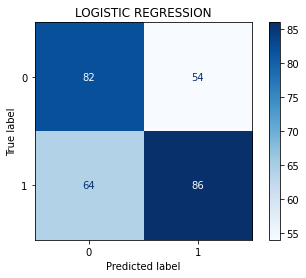

KNeighborsClassifier()

Classification report:
               precision    recall  f1-score   support

         0.0       0.54      0.67      0.60       136
         1.0       0.62      0.49      0.54       150

    accuracy                           0.57       286
   macro avg       0.58      0.58      0.57       286
weighted avg       0.58      0.57      0.57       286

Confusion matrix:

[[91 45]
 [77 73]]
0.6186440677966102


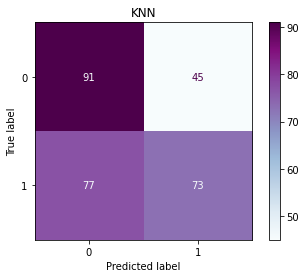


Classification report:
               precision    recall  f1-score   support

         0.0       0.54      0.68      0.60       136
         1.0       0.62      0.47      0.53       150

    accuracy                           0.57       286
   macro avg       0.58      0.58      0.57       286
weighted avg       0.58      0.57      0.57       286

Confusion matrix:

[[93 43]
 [80 70]]
0.6194690265486725


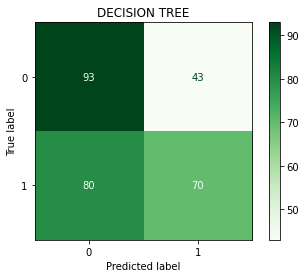

GaussianNB()

Classification report:
               precision    recall  f1-score   support

         0.0       0.59      0.46      0.52       136
         1.0       0.59      0.71      0.65       150

    accuracy                           0.59       286
   macro avg       0.59      0.59      0.58       286
weighted avg       0.59      0.59      0.59       286

Confusion matrix:

[[ 63  73]
 [ 43 107]]
0.5944444444444444


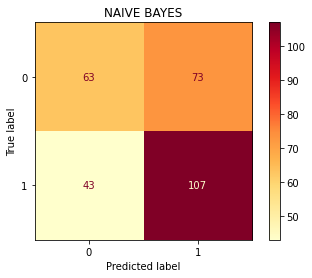

RECALL:  0.7133333333333334


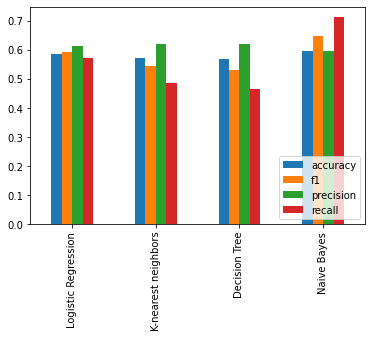

,Logistic Regression,K-nearest neighbors,Decision Tree,Naive Bayes
accuracy,0.587413,0.573427,0.569930,0.594406
f1,0.593103,0.544776,0.532319,0.648485
precision,0.614286,0.618644,0.619469,0.594444
recall,0.573333,0.486667,0.466667,0.713333


In [6]:
################################## SUPERVISED LEARNING ##################################
import sklearn.model_selection




dict_results = {}

#Segment the data in a training and test set with a 70/30 split
xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(x, y, test_size = 0.30)

############################# Logistic regression ######################################

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(xtrain,ytrain)
##PROBA?

print(model)
ypred = model.predict(xtest)

## predictions
print("\nClassification report:\n", metrics.classification_report(ytest,ypred))
print("Confusion matrix:\n")
print(metrics.confusion_matrix(ytest,ypred))

print(sklearn.metrics.precision_score(ytest,ypred))
class_names = (0,1)
#sklearn.metrics.plot_confusion_matrix(model,xtest,ytest)
sklearn.metrics.plot_confusion_matrix(model,xtest,ytest,display_labels=class_names,cmap=plt.cm.Blues)
## to choose more colormaps: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.title('LOGISTIC REGRESSION')
plt.show()



dict_results['Logistic Regression'] = print_metrics(ytest, ypred)

############################## K NEAREST NEIGHBORS ##############################
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier()
#model2 = KNeighborsClassifier(weights = 'distance')
model2.fit(xtrain,ytrain)

print(model2)
ypred = model2.predict(xtest)

## predictions
print("\nClassification report:\n", metrics.classification_report(ytest,ypred))
print("Confusion matrix:\n")
print(metrics.confusion_matrix(ytest,ypred))


print(sklearn.metrics.precision_score(ytest,ypred))
class_names = (0,1)
#sklearn.metrics.plot_confusion_matrix(model,xtest,ytest)
sklearn.metrics.plot_confusion_matrix(model2,xtest,ytest,display_labels=class_names,cmap=plt.cm.BuPu)
## to choose more colormaps: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.title('KNN')
plt.show()


dict_results['K-nearest neighbors'] = print_metrics(ytest, ypred)
############################## DECISION TREEEE ##############################

from sklearn.tree import DecisionTreeClassifier

model3 = DecisionTreeClassifier()
model3.fit(xtrain,ytrain)


ypred = model3.predict(xtest)

## predictions
print("\nClassification report:\n", metrics.classification_report(ytest,ypred))
print("Confusion matrix:\n")
print(metrics.confusion_matrix(ytest,ypred))


print(sklearn.metrics.precision_score(ytest,ypred))
class_names = (0,1)
#sklearn.metrics.plot_confusion_matrix(model,xtest,ytest)
sklearn.metrics.plot_confusion_matrix(model3,xtest,ytest,display_labels=class_names,cmap=plt.cm.Greens)
## to choose more colormaps: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.title('DECISION TREE')
plt.show()


dict_results['Decision Tree'] = print_metrics(ytest, ypred)
################################### NAIVE BAYES ####################################


from sklearn.naive_bayes import GaussianNB


model4 =  GaussianNB()
model4.fit(xtrain,ytrain)

print(model4)
ypred = model4.predict(xtest)

## predictions
print("\nClassification report:\n", metrics.classification_report(ytest,ypred))
print("Confusion matrix:\n")
print(metrics.confusion_matrix(ytest,ypred))





print(sklearn.metrics.precision_score(ytest,ypred))
class_names = (0,1)
#sklearn.metrics.plot_confusion_matrix(model,xtest,ytest)
sklearn.metrics.plot_confusion_matrix(model4,xtest,ytest,display_labels=class_names,cmap=plt.cm.YlOrRd)
## to choose more colormaps: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.title('NAIVE BAYES')
plt.show()
print('RECALL: ',metrics.recall_score(ytest, ypred))

dict_results['Naive Bayes'] = print_metrics(ytest, ypred)


############## final comparison table #################
supT = pd.DataFrame(dict_results).T
sup = pd.DataFrame(dict_results)


## este es el plot que quiero
supT
supT.plot.bar()
plt.legend(loc = 'lower right')
plt.show()

## y esta tabla
sup